Machine Learning approach requires:
1. Represent: a representational space
2. evaluate: loss function on data
3. select: optimizer

Each neuron/unit is:
Acyclic: no unit's value can be based, even indirectly, on its own value.
Activation: each connection has its own weight
Activation of Unit: weighted sum of all incoming connections then transformed into an activation by the unit's activation function.
X.1 = [inputx1 * weight1j]
X.2 = [inputx2 * weight2j]
X.3 = [inputx3 * weight3j]

weighted sum = X.1 + X.2 + X.3

activationxj = sigmoid(weighted_sum)

---

Activation functions:
1. linear: sigma(x) = x
2. sigmoid: sigma(x) = [1/(1+e^-s)]
3. ReLU: sigma(x) = *if x <= 0 then sigma(x)=0; if x > 0 then sigma(x) = x

---

In [ ]:
# basic ReLU activation preparation
x[j] = max(0, sum([w[i,j] * x[i] for int in range(j)]))

In [1]:
i=None
j=None
X=[]
w=[]

x[i] = max(0, sum([w[i, j] * x[j] for j in range(i)]))

x[89044] = max(0, sum([w[89044, j] * x[j] for j in range(89044)]))
x[89045] = max(0, sum([w[89045, j] * x[j] for j in range(89045)]))
x[89046] = max(0, sum([w[89046, j] * x[j] for j in range(89046)]))
# ... all the way through (of course this would be looped)
x[120000] = max(0, sum([w[120000, j] * x[j] for j in range(120000)]))


TypeError: 'NoneType' object cannot be interpreted as an integer

In [1]:
# read in MNIST dataset
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [2]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

train_sample = 5000
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_sample, test_size=1000)

import random

i = random.randint(0, len(X_train))
print(X_train)
y_train[i]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


'8'

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_leaf_nodes=170)
clf = clf.fit(X_train, y_train)
correct = 0
for i in range(len(X_test)):
    if clf.predict([X_test[i]]) == y_test[i]: correct = correct+1
    acc = [100.0 * correct / len(X_test)]
acc

[76.8]

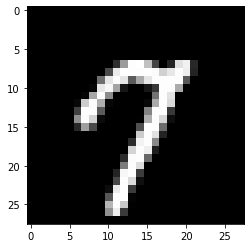

'7'

In [8]:
import matplotlib.pyplot as plt
import numpy as np

img = np.array(X_train[i]).reshape(28,28)
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.show()
y_train[i]

In [9]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[],max_iter=10000,activation='identity')
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print(score)

0.848


In [10]:
len(clf.coefs_[0].T)

10